In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
test = pd.read_csv("../data/test.csv")
test.head(3)

,unitID,weekID,outcome,treatment,X1,X2,X3,E_2,E_3,E_4,E_5,E_6
0,UNIT00053,0,5.758902,0.0,3.843408,10.157897,0,0,0,0,0,0
1,UNIT00053,1,5.820083,0.0,3.843408,10.145571,0,0,0,0,0,0
2,UNIT00053,2,5.872118,0.0,3.843408,10.132295,0,0,0,0,0,0


In [3]:
true = np.array(test[test['weekID']>=90]['outcome']).reshape(392,5)
num_preds = true.shape[0]*true.shape[1]

# Persistence Forecast

In [4]:
persist_baseline = np.repeat(test[test['weekID'] == 90]['outcome'].values.reshape(-1,1), 5, axis=1)
persist_baseline

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [5.45958551, 5.45958551, 5.45958551, 5.45958551, 5.45958551],
       [5.79301361, 5.79301361, 5.79301361, 5.79301361, 5.79301361],
       ...,
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [6.0591232 , 6.0591232 , 6.0591232 , 6.0591232 , 6.0591232 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [5]:
frob_norm = np.sqrt(np.sum((persist_baseline - true)**2)/num_preds)
frob_norm

2.1039326342308766

In [6]:
frob_norm_log = np.sqrt(np.sum((np.log(persist_baseline+1) - np.log(true+1))**2)/num_preds)
frob_norm_log

0.7264557598249053

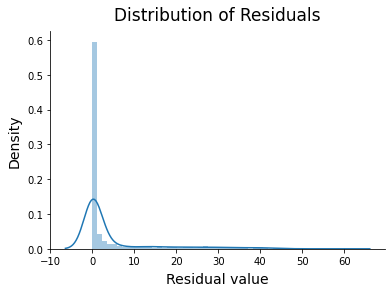

In [7]:
residuals = ((persist_baseline - true)**2).flatten()

plt.figure(figsize=(6,4))
sns.distplot(residuals)
plt.xlabel(r"Residual value", fontsize=14, labelpad=6)
plt.ylabel("Density", fontsize=14, labelpad=6)
plt.title("Distribution of Residuals", size=17, pad=11)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()

## Moving Average baseline

## ARIMA baseline

## LSTM baseline